In [1]:
data_file=r'C:\Users\Anmol\Desktop\Project\Train_Data_SAD.csv'

import pandas as pd
import math
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


## Train Data Set
Train_ld=pd.read_csv(data_file)
Train_ld.head()

,Stress,Anxiety,Depression,Anxiety.1,Depression.1,Stress.1,Anxiety.2,Stress.2,Anxiety.3,Depression.2,...,Stress.5,Anxiety.4,Depression.4,Depression.5,Stress.6,Anxiety.5,Anxiety.6,Depression.6,Full Name,Gender
0,2,3,1,2,1,0,1,2,1,1,...,1,2,0,0,3,2.0,1,0,Anu Priya,F
1,0,1,1,0,1,2,0,1,1,1,...,1,1,1,1,1,1.0,0,1,Anubha,F
2,3,0,2,0,2,0,0,1,1,1,...,1,1,1,1,1,0.0,0,3,Monalisha sinha,F
3,1,1,0,0,0,0,1,0,1,2,...,1,0,1,0,0,0.0,1,0,Mkm,M
4,1,1,3,0,2,1,2,2,0,3,...,2,0,2,3,0,1.0,1,3,Debasmita Maiti,F


In [2]:
Train_ld.shape

(116, 23)

In [3]:
Train_ld.dtypes

Stress            int64
Anxiety           int64
Depression        int64
Anxiety.1         int64
Depression.1      int64
Stress.1          int64
Anxiety.2         int64
Stress.2          int64
Anxiety.3         int64
Depression.2      int64
Stress.3          int64
Stress.4          int64
Depression.3    float64
Stress.5          int64
Anxiety.4         int64
Depression.4      int64
Depression.5      int64
Stress.6          int64
Anxiety.5       float64
Anxiety.6         int64
Depression.6      int64
Full Name        object
Gender           object
dtype: object

In [4]:
print(Train_ld.columns)

Index(['Stress', 'Anxiety', 'Depression', 'Anxiety.1', 'Depression.1',
       'Stress.1', 'Anxiety.2', 'Stress.2', 'Anxiety.3', 'Depression.2',
       'Stress.3', 'Stress.4', 'Depression.3', 'Stress.5', 'Anxiety.4',
       'Depression.4', 'Depression.5', 'Stress.6', 'Anxiety.5', 'Anxiety.6',
       'Depression.6', 'Full Name', 'Gender'],
      dtype='object')


In [5]:
Train_ld.isnull().sum()

Stress          0
Anxiety         0
Depression      0
Anxiety.1       0
Depression.1    0
Stress.1        0
Anxiety.2       0
Stress.2        0
Anxiety.3       0
Depression.2    0
Stress.3        0
Stress.4        0
Depression.3    1
Stress.5        0
Anxiety.4       0
Depression.4    0
Depression.5    0
Stress.6        0
Anxiety.5       1
Anxiety.6       0
Depression.6    0
Full Name       0
Gender          0
dtype: int64

In [6]:
Train_ld['Depression.3'] = Train_ld['Depression.3'].fillna(Train_ld['Depression.3'].mode()[0])
Train_ld['Anxiety.5'] = Train_ld['Anxiety.5'].fillna(Train_ld['Anxiety.5'].mode()[0])
Train_ld.isnull().sum()

Stress          0
Anxiety         0
Depression      0
Anxiety.1       0
Depression.1    0
Stress.1        0
Anxiety.2       0
Stress.2        0
Anxiety.3       0
Depression.2    0
Stress.3        0
Stress.4        0
Depression.3    0
Stress.5        0
Anxiety.4       0
Depression.4    0
Depression.5    0
Stress.6        0
Anxiety.5       0
Anxiety.6       0
Depression.6    0
Full Name       0
Gender          0
dtype: int64

In [7]:
Train_ld['Depression.3'] = Train_ld['Depression.3'].apply(np.int64)
Train_ld['Anxiety.5'] = Train_ld['Anxiety.5'].apply(np.int64)
Train_ld.dtypes

Stress           int64
Anxiety          int64
Depression       int64
Anxiety.1        int64
Depression.1     int64
Stress.1         int64
Anxiety.2        int64
Stress.2         int64
Anxiety.3        int64
Depression.2     int64
Stress.3         int64
Stress.4         int64
Depression.3     int64
Stress.5         int64
Anxiety.4        int64
Depression.4     int64
Depression.5     int64
Stress.6         int64
Anxiety.5        int64
Anxiety.6        int64
Depression.6     int64
Full Name       object
Gender          object
dtype: object

In [8]:
Train_ld.drop('Full Name', axis=1, inplace=True)
Train_ld.head()

,Stress,Anxiety,Depression,Anxiety.1,Depression.1,Stress.1,Anxiety.2,Stress.2,Anxiety.3,Depression.2,...,Depression.3,Stress.5,Anxiety.4,Depression.4,Depression.5,Stress.6,Anxiety.5,Anxiety.6,Depression.6,Gender
0,2,3,1,2,1,0,1,2,1,1,...,1,1,2,0,0,3,2,1,0,F
1,0,1,1,0,1,2,0,1,1,1,...,1,1,1,1,1,1,1,0,1,F
2,3,0,2,0,2,0,0,1,1,1,...,2,1,1,1,1,1,0,0,3,F
3,1,1,0,0,0,0,1,0,1,2,...,1,1,0,1,0,0,0,1,0,M
4,1,1,3,0,2,1,2,2,0,3,...,1,2,0,2,3,0,1,1,3,F


In [9]:
Gender_Count = {'M': 1,'F': 2}
Train_ld.Gender = [Gender_Count[item] for item in Train_ld.Gender] 
#le = LabelEncoder()
#ld['Gender'] = le.fit_transform(ld['Gender'])
Train_ld.head()

,Stress,Anxiety,Depression,Anxiety.1,Depression.1,Stress.1,Anxiety.2,Stress.2,Anxiety.3,Depression.2,...,Depression.3,Stress.5,Anxiety.4,Depression.4,Depression.5,Stress.6,Anxiety.5,Anxiety.6,Depression.6,Gender
0,2,3,1,2,1,0,1,2,1,1,...,1,1,2,0,0,3,2,1,0,2
1,0,1,1,0,1,2,0,1,1,1,...,1,1,1,1,1,1,1,0,1,2
2,3,0,2,0,2,0,0,1,1,1,...,2,1,1,1,1,1,0,0,3,2
3,1,1,0,0,0,0,1,0,1,2,...,1,1,0,1,0,0,0,1,0,1
4,1,1,3,0,2,1,2,2,0,3,...,1,2,0,2,3,0,1,1,3,2


In [10]:
#ld = ld.drop(['Full Name'])

In [11]:
print(Train_ld.columns)

Index(['Stress', 'Anxiety', 'Depression', 'Anxiety.1', 'Depression.1',
       'Stress.1', 'Anxiety.2', 'Stress.2', 'Anxiety.3', 'Depression.2',
       'Stress.3', 'Stress.4', 'Depression.3', 'Stress.5', 'Anxiety.4',
       'Depression.4', 'Depression.5', 'Stress.6', 'Anxiety.5', 'Anxiety.6',
       'Depression.6', 'Gender'],
      dtype='object')


In [12]:
Total_Stress_Count = Train_ld["Stress"] + Train_ld["Stress.1"] + Train_ld["Stress.2"] + Train_ld["Stress.3"] + Train_ld["Stress.4"] + Train_ld["Stress.5"] + Train_ld["Stress.6"]
Train_ld["Total_Stress_Count"] = 2*Total_Stress_Count

Total_Anxiety_Count = Train_ld["Anxiety"] + Train_ld["Anxiety.1"] + Train_ld["Anxiety.2"] + Train_ld["Anxiety.3"] + Train_ld["Anxiety.4"] + Train_ld["Anxiety.5"] + Train_ld["Anxiety.6"]
Train_ld["Total_Anxiety_Count"] = 2*Total_Anxiety_Count

Total_Depression_Count = Train_ld["Depression"] + Train_ld["Depression.1"] + Train_ld["Depression.2"] + Train_ld["Depression.3"] + Train_ld["Depression.4"] + Train_ld["Depression.5"] + Train_ld["Depression.6"]
Train_ld["Total_Depression_Count"] = 2*Total_Depression_Count

Train_ld.head()

,Stress,Anxiety,Depression,Anxiety.1,Depression.1,Stress.1,Anxiety.2,Stress.2,Anxiety.3,Depression.2,...,Depression.4,Depression.5,Stress.6,Anxiety.5,Anxiety.6,Depression.6,Gender,Total_Stress_Count,Total_Anxiety_Count,Total_Depression_Count
0,2,3,1,2,1,0,1,2,1,1,...,0,0,3,2,1,0,2,26,24,8
1,0,1,1,0,1,2,0,1,1,1,...,1,1,1,1,0,1,2,14,8,14
2,3,0,2,0,2,0,0,1,1,1,...,1,1,1,0,0,3,2,20,4,24
3,1,1,0,0,0,0,1,0,1,2,...,1,0,0,0,1,0,1,8,8,8
4,1,1,3,0,2,1,2,2,0,3,...,2,3,0,1,1,3,2,12,10,34


In [13]:
Train_ld['Total_Stress_Count'] = pd.cut(Train_ld['Total_Stress_Count'], [0, 14, 18, 25, 33, 100], labels=['Normal', 'Mild', 'Moderate','Severe','Extremely Severe'])

Train_ld['Total_Anxiety_Count'] = pd.cut(Train_ld['Total_Anxiety_Count'], [0, 7, 9, 14, 19, 100], labels=['Normal', 'Mild', 'Moderate','Severe','Extremely Severe'])

Train_ld['Total_Depression_Count'] = pd.cut(Train_ld['Total_Depression_Count'], [0, 9, 13, 20, 27, 100], labels=['Normal', 'Mild', 'Moderate','Severe','Extremely Severe'])

Train_ld.head()

,Stress,Anxiety,Depression,Anxiety.1,Depression.1,Stress.1,Anxiety.2,Stress.2,Anxiety.3,Depression.2,...,Depression.4,Depression.5,Stress.6,Anxiety.5,Anxiety.6,Depression.6,Gender,Total_Stress_Count,Total_Anxiety_Count,Total_Depression_Count
0,2,3,1,2,1,0,1,2,1,1,...,0,0,3,2,1,0,2,Severe,Extremely Severe,Normal
1,0,1,1,0,1,2,0,1,1,1,...,1,1,1,1,0,1,2,Normal,Mild,Moderate
2,3,0,2,0,2,0,0,1,1,1,...,1,1,1,0,0,3,2,Moderate,Normal,Severe
3,1,1,0,0,0,0,1,0,1,2,...,1,0,0,0,1,0,1,Normal,Mild,Normal
4,1,1,3,0,2,1,2,2,0,3,...,2,3,0,1,1,3,2,Normal,Moderate,Extremely Severe


In [14]:
print(Train_ld.columns)

Index(['Stress', 'Anxiety', 'Depression', 'Anxiety.1', 'Depression.1',
       'Stress.1', 'Anxiety.2', 'Stress.2', 'Anxiety.3', 'Depression.2',
       'Stress.3', 'Stress.4', 'Depression.3', 'Stress.5', 'Anxiety.4',
       'Depression.4', 'Depression.5', 'Stress.6', 'Anxiety.5', 'Anxiety.6',
       'Depression.6', 'Gender', 'Total_Stress_Count', 'Total_Anxiety_Count',
       'Total_Depression_Count'],
      dtype='object')


In [15]:
Train_ld = Train_ld.drop(['Stress', 'Anxiety', 'Depression', 'Anxiety.1', 'Depression.1',
       'Stress.1', 'Anxiety.2', 'Stress.2', 'Anxiety.3', 'Depression.2',
       'Stress.3', 'Stress.4', 'Depression.3', 'Stress.5', 'Anxiety.4',
       'Depression.4', 'Depression.5', 'Stress.6', 'Anxiety.5', 'Anxiety.6',
       'Depression.6'], axis=1)
Train_ld.head()

,Gender,Total_Stress_Count,Total_Anxiety_Count,Total_Depression_Count
0,2,Severe,Extremely Severe,Normal
1,2,Normal,Mild,Moderate
2,2,Moderate,Normal,Severe
3,1,Normal,Mild,Normal
4,2,Normal,Moderate,Extremely Severe


In [16]:
Train_ld.dtypes

Gender                       int64
Total_Stress_Count        category
Total_Anxiety_Count       category
Total_Depression_Count    category
dtype: object

In [17]:
Train_ld['Total_Stress_Count'] = Train_ld['Total_Stress_Count'].astype(str)
Train_ld['Total_Anxiety_Count'] = Train_ld['Total_Anxiety_Count'].astype(str)
Train_ld['Total_Depression_Count'] = Train_ld['Total_Depression_Count'].astype(str)
Train_ld.dtypes
#ld['Total_Stress_Count'] = ld['Total_Stress_Count'].apply(np.int64)
#ld['Anxiety.5'] = ld['Anxiety.5'].apply(np.int64)
#ld.dtypes

Gender                     int64
Total_Stress_Count        object
Total_Anxiety_Count       object
Total_Depression_Count    object
dtype: object

In [18]:
Train_ld.Total_Stress_Count.unique()

array(['Severe', 'Normal', 'Moderate', 'Extremely Severe', 'Mild', 'nan'],
      dtype=object)

In [19]:
Train_ld['Total_Stress_Count'].mode()

0    Normal
dtype: object

In [20]:
Train_ld['Total_Stress_Count'] = Train_ld['Total_Stress_Count'].replace('nan','Normal' )
Train_ld.Total_Stress_Count.unique()

array(['Severe', 'Normal', 'Moderate', 'Extremely Severe', 'Mild'],
      dtype=object)

In [21]:
Train_ld['Total_Anxiety_Count'].mode()

0    Moderate
dtype: object

In [22]:
Train_ld['Total_Anxiety_Count'] = Train_ld['Total_Anxiety_Count'].replace('nan','Moderate' )
Train_ld.Total_Anxiety_Count.unique()

array(['Extremely Severe', 'Mild', 'Normal', 'Moderate', 'Severe'],
      dtype=object)

In [23]:
Train_ld['Total_Depression_Count'].mode()

0    Normal
dtype: object

In [24]:
Train_ld['Total_Depression_Count'] = Train_ld['Total_Depression_Count'].replace('nan','Normal' )
Train_ld.Total_Depression_Count.unique()

array(['Normal', 'Moderate', 'Severe', 'Extremely Severe', 'Mild'],
      dtype=object)

In [25]:
Stress_Count = {'Normal': 1,'Mild': 2,'Moderate': 3,'Severe': 4,'Extremely Severe': 5} 

In [26]:
Train_ld.Total_Stress_Count = [Stress_Count[item] for item in Train_ld.Total_Stress_Count] 

In [27]:
print(Train_ld)

     Gender  Total_Stress_Count Total_Anxiety_Count Total_Depression_Count
0         2                   4    Extremely Severe                 Normal
1         2                   1                Mild               Moderate
2         2                   3              Normal                 Severe
3         1                   1                Mild                 Normal
4         2                   1            Moderate       Extremely Severe
..      ...                 ...                 ...                    ...
111       2                   4    Extremely Severe       Extremely Severe
112       1                   3            Moderate                 Normal
113       1                   3    Extremely Severe                 Normal
114       2                   1            Moderate               Moderate
115       1                   1            Moderate               Moderate

[116 rows x 4 columns]


In [28]:
Anxiety_Count = {'Normal': 1,'Mild': 2,'Moderate': 3,'Severe': 4,'Extremely Severe': 5} 

In [29]:
Train_ld.Total_Anxiety_Count = [Anxiety_Count[item] for item in Train_ld.Total_Anxiety_Count] 

In [30]:
print(Train_ld)

     Gender  Total_Stress_Count  Total_Anxiety_Count Total_Depression_Count
0         2                   4                    5                 Normal
1         2                   1                    2               Moderate
2         2                   3                    1                 Severe
3         1                   1                    2                 Normal
4         2                   1                    3       Extremely Severe
..      ...                 ...                  ...                    ...
111       2                   4                    5       Extremely Severe
112       1                   3                    3                 Normal
113       1                   3                    5                 Normal
114       2                   1                    3               Moderate
115       1                   1                    3               Moderate

[116 rows x 4 columns]


In [31]:
Depression_Count = {'Normal': 1,'Mild': 2,'Moderate': 3,'Severe': 4,'Extremely Severe': 5}

In [32]:
Train_ld.Total_Depression_Count = [Depression_Count[item] for item in Train_ld.Total_Depression_Count] 

In [33]:
Train_ld.head()

,Gender,Total_Stress_Count,Total_Anxiety_Count,Total_Depression_Count
0,2,4,5,1
1,2,1,2,3
2,2,3,1,4
3,1,1,2,1
4,2,1,3,5


In [34]:
x_train = Train_ld.drop(['Gender'],axis=1)
y_train = Train_ld.Gender

In [35]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [36]:
D_T = DecisionTreeClassifier()
D_T.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
## Test Data Set
data_file=r'C:\Users\Anmol\Desktop\Project\Test_Data_SAD.csv'
Test_ld=pd.read_csv(data_file)
Test_ld.head()

,Stress,Anxiety,Depression,Anxiety.1,Depression.1,Stress.1,Anxiety.2,Stress.2,Anxiety.3,Depression.2,...,Stress.5,Anxiety.4,Depression.4,Depression.5,Stress.6,Anxiety.5,Anxiety.6,Depression.6,Full Name,Gender
0,2,3,1,2,1,0,1,2,1,1,...,1,2,0,0,3,2.0,1,0,Anu Priya,F
1,0,1,1,0,1,2,0,1,1,1,...,1,1,1,1,1,1.0,0,1,Anubha,F
2,3,0,2,0,2,0,0,1,1,1,...,1,1,1,1,1,0.0,0,3,Monalisha sinha,F
3,1,1,0,0,0,0,1,0,1,2,...,1,0,1,0,0,0.0,1,0,Mkm,M
4,1,1,3,0,2,1,2,2,0,3,...,2,0,2,3,0,1.0,1,3,Debasmita Maiti,F


In [38]:
Test_ld.shape

(116, 23)

In [39]:
Test_ld.dtypes

Stress            int64
Anxiety           int64
Depression        int64
Anxiety.1         int64
Depression.1      int64
Stress.1          int64
Anxiety.2         int64
Stress.2          int64
Anxiety.3         int64
Depression.2      int64
Stress.3          int64
Stress.4          int64
Depression.3    float64
Stress.5          int64
Anxiety.4         int64
Depression.4      int64
Depression.5      int64
Stress.6          int64
Anxiety.5       float64
Anxiety.6         int64
Depression.6      int64
Full Name        object
Gender           object
dtype: object

In [40]:
print(Test_ld.columns)

Index(['Stress', 'Anxiety', 'Depression', 'Anxiety.1', 'Depression.1',
       'Stress.1', 'Anxiety.2', 'Stress.2', 'Anxiety.3', 'Depression.2',
       'Stress.3', 'Stress.4', 'Depression.3', 'Stress.5', 'Anxiety.4',
       'Depression.4', 'Depression.5', 'Stress.6', 'Anxiety.5', 'Anxiety.6',
       'Depression.6', 'Full Name', 'Gender'],
      dtype='object')


In [41]:
Test_ld.isnull().sum()

Stress          0
Anxiety         0
Depression      0
Anxiety.1       0
Depression.1    0
Stress.1        0
Anxiety.2       0
Stress.2        0
Anxiety.3       0
Depression.2    0
Stress.3        0
Stress.4        0
Depression.3    1
Stress.5        0
Anxiety.4       0
Depression.4    0
Depression.5    0
Stress.6        0
Anxiety.5       1
Anxiety.6       0
Depression.6    0
Full Name       0
Gender          0
dtype: int64

In [42]:
Test_ld['Depression.3'] = Test_ld['Depression.3'].fillna(Test_ld['Depression.3'].mode()[0])
Test_ld['Anxiety.5'] = Test_ld['Anxiety.5'].fillna(Test_ld['Anxiety.5'].mode()[0])
Test_ld.isnull().sum()

Stress          0
Anxiety         0
Depression      0
Anxiety.1       0
Depression.1    0
Stress.1        0
Anxiety.2       0
Stress.2        0
Anxiety.3       0
Depression.2    0
Stress.3        0
Stress.4        0
Depression.3    0
Stress.5        0
Anxiety.4       0
Depression.4    0
Depression.5    0
Stress.6        0
Anxiety.5       0
Anxiety.6       0
Depression.6    0
Full Name       0
Gender          0
dtype: int64

In [43]:
Test_ld['Depression.3'] = Test_ld['Depression.3'].apply(np.int64)
Test_ld['Anxiety.5'] = Test_ld['Anxiety.5'].apply(np.int64)
Test_ld.dtypes

Stress           int64
Anxiety          int64
Depression       int64
Anxiety.1        int64
Depression.1     int64
Stress.1         int64
Anxiety.2        int64
Stress.2         int64
Anxiety.3        int64
Depression.2     int64
Stress.3         int64
Stress.4         int64
Depression.3     int64
Stress.5         int64
Anxiety.4        int64
Depression.4     int64
Depression.5     int64
Stress.6         int64
Anxiety.5        int64
Anxiety.6        int64
Depression.6     int64
Full Name       object
Gender          object
dtype: object

In [44]:
Test_ld.drop('Full Name', axis=1, inplace=True)
Test_ld.head()

,Stress,Anxiety,Depression,Anxiety.1,Depression.1,Stress.1,Anxiety.2,Stress.2,Anxiety.3,Depression.2,...,Depression.3,Stress.5,Anxiety.4,Depression.4,Depression.5,Stress.6,Anxiety.5,Anxiety.6,Depression.6,Gender
0,2,3,1,2,1,0,1,2,1,1,...,1,1,2,0,0,3,2,1,0,F
1,0,1,1,0,1,2,0,1,1,1,...,1,1,1,1,1,1,1,0,1,F
2,3,0,2,0,2,0,0,1,1,1,...,2,1,1,1,1,1,0,0,3,F
3,1,1,0,0,0,0,1,0,1,2,...,1,1,0,1,0,0,0,1,0,M
4,1,1,3,0,2,1,2,2,0,3,...,1,2,0,2,3,0,1,1,3,F


In [45]:
Gender_Count = {'M': 1,'F': 2}
Test_ld.Gender = [Gender_Count[item] for item in Test_ld.Gender] 
#le = LabelEncoder()
#ld['Gender'] = le.fit_transform(ld['Gender'])
Test_ld.head()

,Stress,Anxiety,Depression,Anxiety.1,Depression.1,Stress.1,Anxiety.2,Stress.2,Anxiety.3,Depression.2,...,Depression.3,Stress.5,Anxiety.4,Depression.4,Depression.5,Stress.6,Anxiety.5,Anxiety.6,Depression.6,Gender
0,2,3,1,2,1,0,1,2,1,1,...,1,1,2,0,0,3,2,1,0,2
1,0,1,1,0,1,2,0,1,1,1,...,1,1,1,1,1,1,1,0,1,2
2,3,0,2,0,2,0,0,1,1,1,...,2,1,1,1,1,1,0,0,3,2
3,1,1,0,0,0,0,1,0,1,2,...,1,1,0,1,0,0,0,1,0,1
4,1,1,3,0,2,1,2,2,0,3,...,1,2,0,2,3,0,1,1,3,2


In [46]:
print(Test_ld.columns)

Index(['Stress', 'Anxiety', 'Depression', 'Anxiety.1', 'Depression.1',
       'Stress.1', 'Anxiety.2', 'Stress.2', 'Anxiety.3', 'Depression.2',
       'Stress.3', 'Stress.4', 'Depression.3', 'Stress.5', 'Anxiety.4',
       'Depression.4', 'Depression.5', 'Stress.6', 'Anxiety.5', 'Anxiety.6',
       'Depression.6', 'Gender'],
      dtype='object')


In [47]:
Total_Stress_Count = Test_ld["Stress"] + Test_ld["Stress.1"] + Test_ld["Stress.2"] + Test_ld["Stress.3"] + Test_ld["Stress.4"] + Test_ld["Stress.5"] + Test_ld["Stress.6"]
Test_ld["Total_Stress_Count"] = 2*Total_Stress_Count

Total_Anxiety_Count = Test_ld["Anxiety"] + Test_ld["Anxiety.1"] + Test_ld["Anxiety.2"] + Test_ld["Anxiety.3"] + Test_ld["Anxiety.4"] + Test_ld["Anxiety.5"] + Test_ld["Anxiety.6"]
Test_ld["Total_Anxiety_Count"] = 2*Total_Anxiety_Count

Total_Depression_Count = Test_ld["Depression"] + Test_ld["Depression.1"] + Test_ld["Depression.2"] + Test_ld["Depression.3"] + Test_ld["Depression.4"] + Test_ld["Depression.5"] + Test_ld["Depression.6"]
Test_ld["Total_Depression_Count"] = 2*Total_Depression_Count

Test_ld.head()

,Stress,Anxiety,Depression,Anxiety.1,Depression.1,Stress.1,Anxiety.2,Stress.2,Anxiety.3,Depression.2,...,Depression.4,Depression.5,Stress.6,Anxiety.5,Anxiety.6,Depression.6,Gender,Total_Stress_Count,Total_Anxiety_Count,Total_Depression_Count
0,2,3,1,2,1,0,1,2,1,1,...,0,0,3,2,1,0,2,26,24,8
1,0,1,1,0,1,2,0,1,1,1,...,1,1,1,1,0,1,2,14,8,14
2,3,0,2,0,2,0,0,1,1,1,...,1,1,1,0,0,3,2,20,4,24
3,1,1,0,0,0,0,1,0,1,2,...,1,0,0,0,1,0,1,8,8,8
4,1,1,3,0,2,1,2,2,0,3,...,2,3,0,1,1,3,2,12,10,34


In [48]:
Test_ld['Total_Stress_Count'] = pd.cut(Test_ld['Total_Stress_Count'], [0, 14, 18, 25, 33, 100], labels=['Normal', 'Mild', 'Moderate','Severe','Extremely Severe'])

Test_ld['Total_Anxiety_Count'] = pd.cut(Test_ld['Total_Anxiety_Count'], [0, 7, 9, 14, 19, 100], labels=['Normal', 'Mild', 'Moderate','Severe','Extremely Severe'])

Test_ld['Total_Depression_Count'] = pd.cut(Test_ld['Total_Depression_Count'], [0, 9, 13, 20, 27, 100], labels=['Normal', 'Mild', 'Moderate','Severe','Extremely Severe'])

Test_ld.head()

,Stress,Anxiety,Depression,Anxiety.1,Depression.1,Stress.1,Anxiety.2,Stress.2,Anxiety.3,Depression.2,...,Depression.4,Depression.5,Stress.6,Anxiety.5,Anxiety.6,Depression.6,Gender,Total_Stress_Count,Total_Anxiety_Count,Total_Depression_Count
0,2,3,1,2,1,0,1,2,1,1,...,0,0,3,2,1,0,2,Severe,Extremely Severe,Normal
1,0,1,1,0,1,2,0,1,1,1,...,1,1,1,1,0,1,2,Normal,Mild,Moderate
2,3,0,2,0,2,0,0,1,1,1,...,1,1,1,0,0,3,2,Moderate,Normal,Severe
3,1,1,0,0,0,0,1,0,1,2,...,1,0,0,0,1,0,1,Normal,Mild,Normal
4,1,1,3,0,2,1,2,2,0,3,...,2,3,0,1,1,3,2,Normal,Moderate,Extremely Severe


In [49]:
print(Test_ld.columns)

Index(['Stress', 'Anxiety', 'Depression', 'Anxiety.1', 'Depression.1',
       'Stress.1', 'Anxiety.2', 'Stress.2', 'Anxiety.3', 'Depression.2',
       'Stress.3', 'Stress.4', 'Depression.3', 'Stress.5', 'Anxiety.4',
       'Depression.4', 'Depression.5', 'Stress.6', 'Anxiety.5', 'Anxiety.6',
       'Depression.6', 'Gender', 'Total_Stress_Count', 'Total_Anxiety_Count',
       'Total_Depression_Count'],
      dtype='object')


In [50]:
Test_ld = Test_ld.drop(['Stress', 'Anxiety', 'Depression', 'Anxiety.1', 'Depression.1',
       'Stress.1', 'Anxiety.2', 'Stress.2', 'Anxiety.3', 'Depression.2',
       'Stress.3', 'Stress.4', 'Depression.3', 'Stress.5', 'Anxiety.4',
       'Depression.4', 'Depression.5', 'Stress.6', 'Anxiety.5', 'Anxiety.6',
       'Depression.6'], axis=1)
Test_ld.head()

,Gender,Total_Stress_Count,Total_Anxiety_Count,Total_Depression_Count
0,2,Severe,Extremely Severe,Normal
1,2,Normal,Mild,Moderate
2,2,Moderate,Normal,Severe
3,1,Normal,Mild,Normal
4,2,Normal,Moderate,Extremely Severe


In [51]:
Test_ld.dtypes

Gender                       int64
Total_Stress_Count        category
Total_Anxiety_Count       category
Total_Depression_Count    category
dtype: object

In [52]:
Test_ld['Total_Stress_Count'] = Test_ld['Total_Stress_Count'].astype(str)
Test_ld['Total_Anxiety_Count'] = Test_ld['Total_Anxiety_Count'].astype(str)
Test_ld['Total_Depression_Count'] = Test_ld['Total_Depression_Count'].astype(str)
Test_ld.dtypes
#ld['Total_Stress_Count'] = ld['Total_Stress_Count'].apply(np.int64)
#ld['Anxiety.5'] = ld['Anxiety.5'].apply(np.int64)
#ld.dtypes

Gender                     int64
Total_Stress_Count        object
Total_Anxiety_Count       object
Total_Depression_Count    object
dtype: object

In [53]:
Test_ld.Total_Stress_Count.unique()

array(['Severe', 'Normal', 'Moderate', 'Extremely Severe', 'Mild', 'nan'],
      dtype=object)

In [54]:
Test_ld['Total_Stress_Count'].mode()

0    Normal
dtype: object

In [55]:
Test_ld['Total_Stress_Count'] = Test_ld['Total_Stress_Count'].replace('nan','Normal' )
Test_ld.Total_Stress_Count.unique()

array(['Severe', 'Normal', 'Moderate', 'Extremely Severe', 'Mild'],
      dtype=object)

In [56]:
Test_ld['Total_Anxiety_Count'].mode()

0    Moderate
dtype: object

In [57]:
Test_ld['Total_Anxiety_Count'] = Test_ld['Total_Anxiety_Count'].replace('nan','Moderate' )
Test_ld.Total_Anxiety_Count.unique()

array(['Extremely Severe', 'Mild', 'Normal', 'Moderate', 'Severe'],
      dtype=object)

In [58]:
Test_ld['Total_Depression_Count'].mode()

0    Normal
dtype: object

In [59]:
Test_ld['Total_Depression_Count'] = Test_ld['Total_Depression_Count'].replace('nan','Normal' )
Test_ld.Total_Depression_Count.unique()

array(['Normal', 'Moderate', 'Severe', 'Extremely Severe', 'Mild'],
      dtype=object)

In [60]:
Stress_Count = {'Normal': 1,'Mild': 2,'Moderate': 3,'Severe': 4,'Extremely Severe': 5} 

In [61]:
Test_ld.Total_Stress_Count = [Stress_Count[item] for item in Test_ld.Total_Stress_Count] 

In [62]:
print(Test_ld)

     Gender  Total_Stress_Count Total_Anxiety_Count Total_Depression_Count
0         2                   4    Extremely Severe                 Normal
1         2                   1                Mild               Moderate
2         2                   3              Normal                 Severe
3         1                   1                Mild                 Normal
4         2                   1            Moderate       Extremely Severe
..      ...                 ...                 ...                    ...
111       2                   4    Extremely Severe       Extremely Severe
112       1                   3            Moderate                 Normal
113       1                   3    Extremely Severe                 Normal
114       2                   1            Moderate               Moderate
115       1                   1            Moderate               Moderate

[116 rows x 4 columns]


In [63]:
Anxiety_Count = {'Normal': 1,'Mild': 2,'Moderate': 3,'Severe': 4,'Extremely Severe': 5} 

In [64]:
Test_ld.Total_Anxiety_Count = [Anxiety_Count[item] for item in Test_ld.Total_Anxiety_Count] 

In [65]:
print(Test_ld)

     Gender  Total_Stress_Count  Total_Anxiety_Count Total_Depression_Count
0         2                   4                    5                 Normal
1         2                   1                    2               Moderate
2         2                   3                    1                 Severe
3         1                   1                    2                 Normal
4         2                   1                    3       Extremely Severe
..      ...                 ...                  ...                    ...
111       2                   4                    5       Extremely Severe
112       1                   3                    3                 Normal
113       1                   3                    5                 Normal
114       2                   1                    3               Moderate
115       1                   1                    3               Moderate

[116 rows x 4 columns]


In [66]:
Depression_Count = {'Normal': 1,'Mild': 2,'Moderate': 3,'Severe': 4,'Extremely Severe': 5}

In [67]:
Test_ld.Total_Depression_Count = [Depression_Count[item] for item in Test_ld.Total_Depression_Count] 

In [68]:
Test_ld.head()

,Gender,Total_Stress_Count,Total_Anxiety_Count,Total_Depression_Count
0,2,4,5,1
1,2,1,2,3
2,2,3,1,4
3,1,1,2,1
4,2,1,3,5


In [69]:
x_test = Test_ld.drop(['Gender'],axis=1)
y_test = Test_ld.Gender

In [70]:
prediction = D_T.predict(x_test)

In [71]:
D_Tdfm = pd.DataFrame(data={'Actual':y_test,'Predicted':prediction})
D_Tdfm.head()
#pd.DataFrame("actual",y_test),("predicted",prediction)
#print(sqrt(mean_squared_error(ytest, prediction)))

,Actual,Predicted
0,2,2
1,2,2
2,2,2
3,1,2
4,2,2


In [72]:
#D_T = DecisionTreeClassifier()
#D_T.fit(x_train,y_train)

# Train Decision Tree Classifer
D_T = D_T.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = D_T.predict(x_test)

In [73]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7931034482758621


In [74]:
D_Tdfm.shape

(116, 2)

In [75]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[34 14]
 [10 58]]
Accuracy Score : 0.7931034482758621
Report : 
              precision    recall  f1-score   support

           1       0.77      0.71      0.74        48
           2       0.81      0.85      0.83        68

    accuracy                           0.79       116
   macro avg       0.79      0.78      0.78       116
weighted avg       0.79      0.79      0.79       116



In [82]:
import pandas as pd
import numpy as np
from sklearn import tree
import numpy as np
from sklearn.metrics import roc_auc_score

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [85]:
random_search=RandomizedSearchCV(D_T,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=10
                                    )

In [86]:
random_search.fit(x_train,y_train)

C:\Users\Anmol\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [87]:
random_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [89]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.506 (std: 0.16005)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 50, 'criterion': 'gini', 'class_weight': None}

Model with rank: 2
Mean validation score: 0.498 (std: 0.16473)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.495 (std: 0.14474)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 70, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 4
Mean validation score: 0.491 (std: 0.15205)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 5
Mean validation score: 0.480 (std: 0.15914)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 5
Mean validation score: 0.48

In [91]:
dtree=random_search.best_estimator_

In [92]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [93]:
dotfile = open("mytree.dot", 'w')

tree.export_graphviz(dtree,out_file=dotfile,
                     feature_names=x_train.columns,
                    class_names=["0","1"],
                     proportion=True)
dotfile.close()

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [101]:
# Train Random Forest Tree Classifer
model = model.fit(x_train,y_train)


In [102]:
#import numpy as np
y_pred_1 = model.predict(x_test)


In [103]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.7931034482758621


In [ ]:
#!pip install pydotplus

In [ ]:
#!pip install GraphViz

C:\Users\Anmol\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


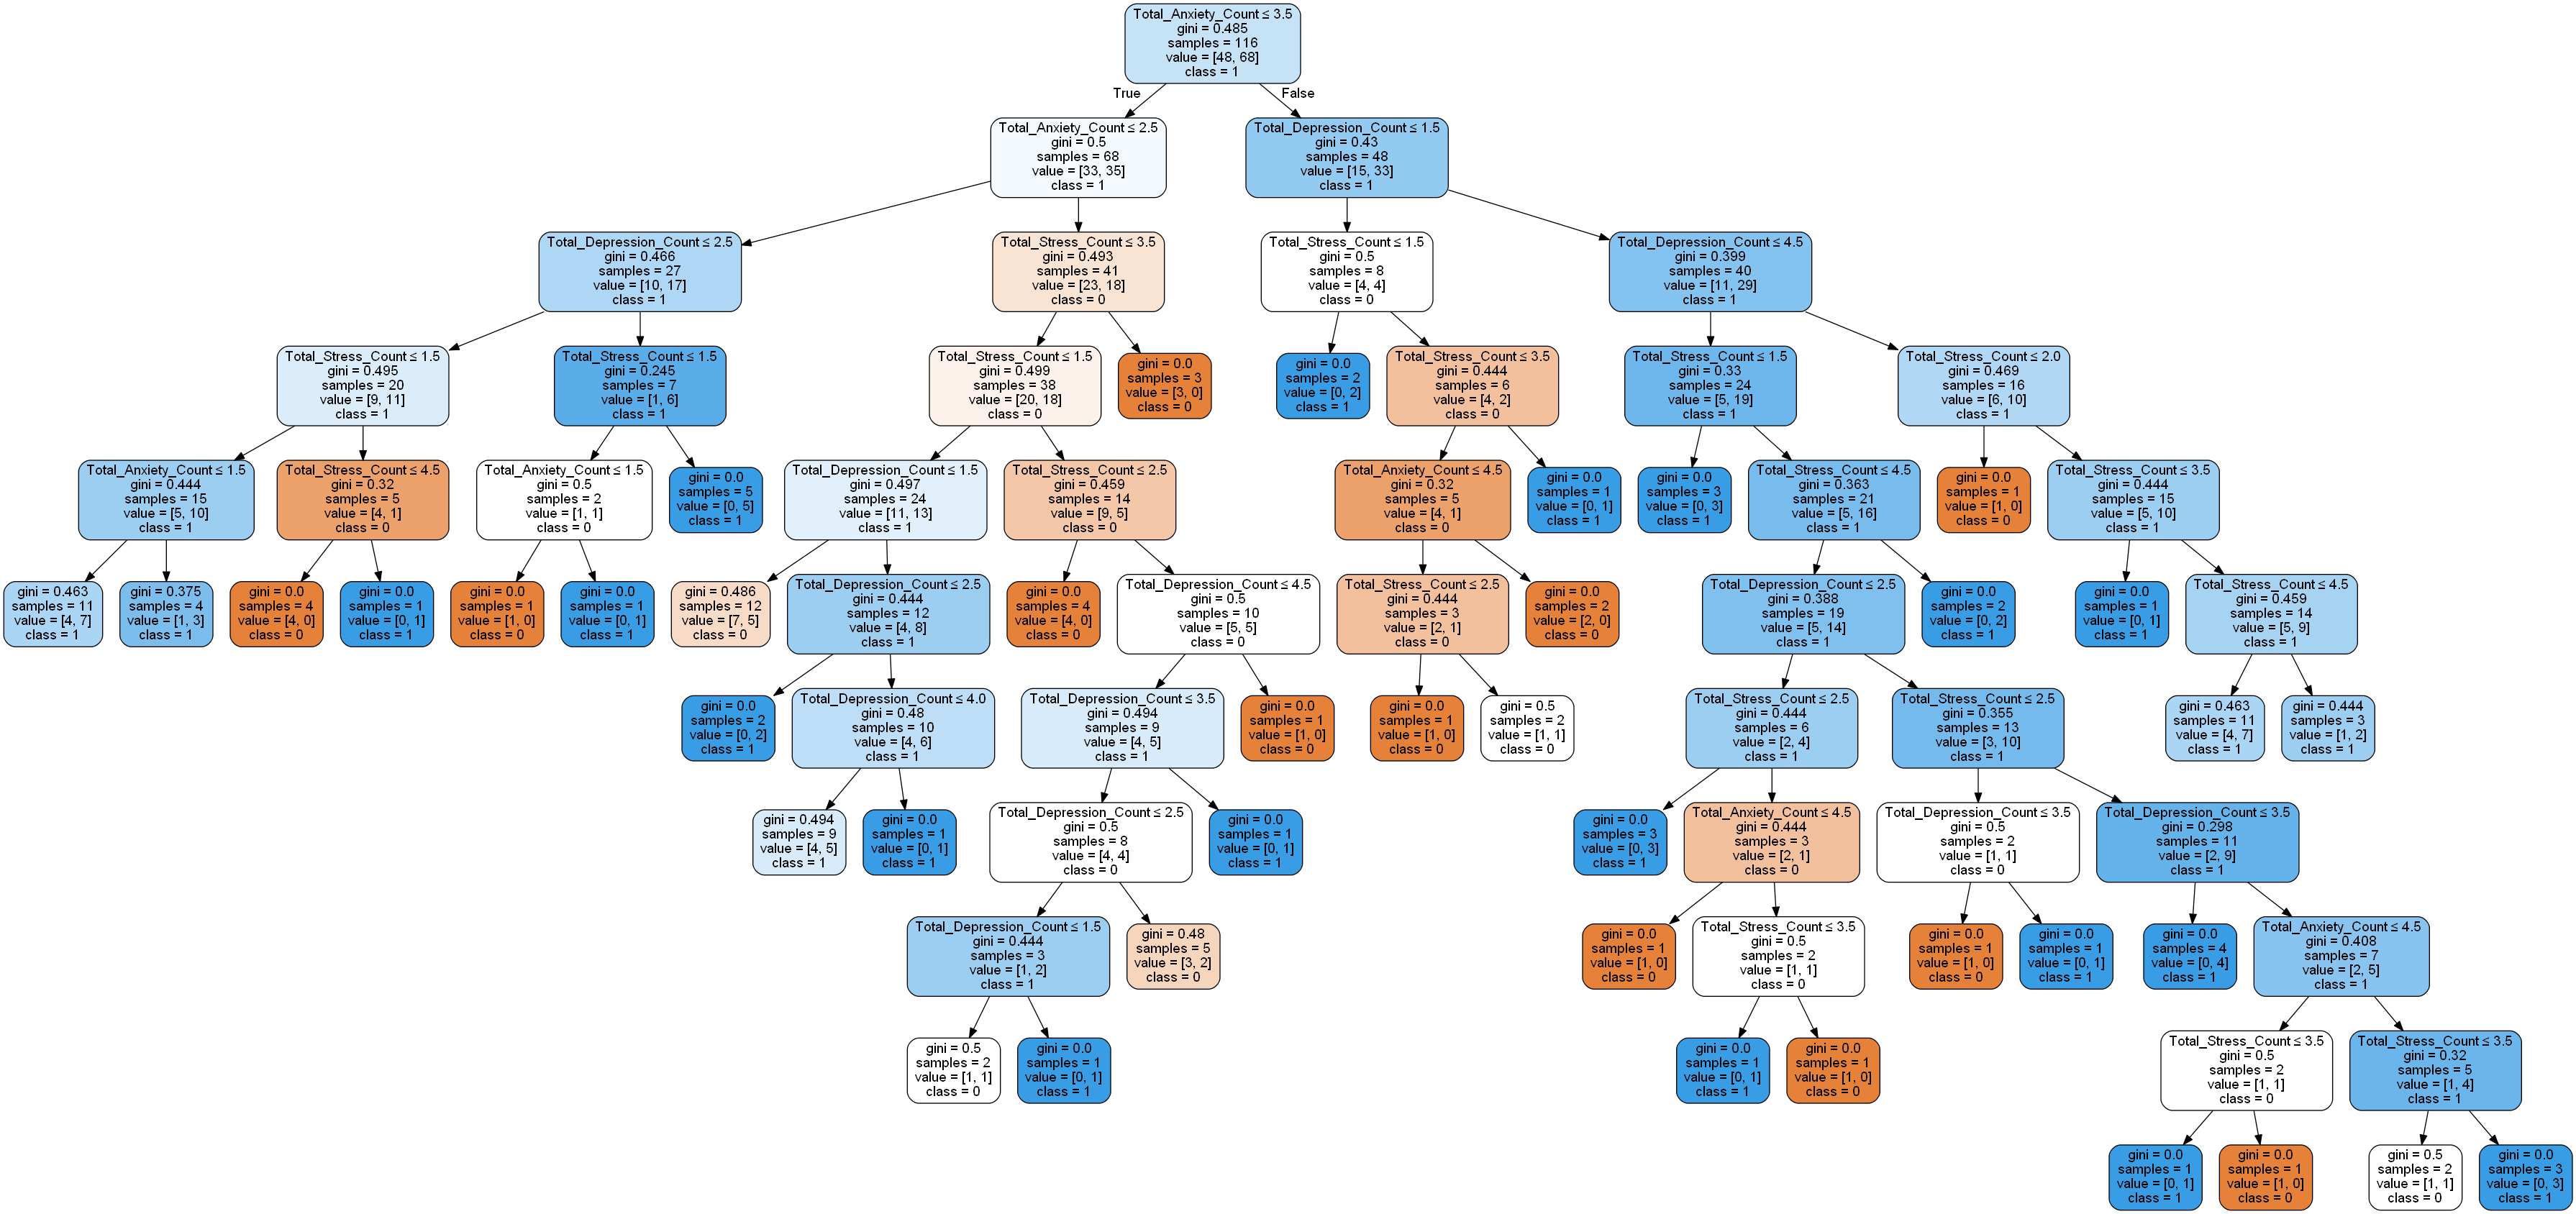

In [104]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(D_T, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_test.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Data_SAD.png')
Image(graph.create_png())

In [105]:
x_test.columns

Index(['Total_Stress_Count', 'Total_Anxiety_Count', 'Total_Depression_Count'], dtype='object')

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
model.predict(x_train)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [120]:
predicted_train = model.predict(x_train)
true_value = y_train

In [121]:
predicted_train

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 61.21%


In [123]:
#C - smaller values specifies stronger regularization ............. tol - tolerance limit for stopping criteria
model = LogisticRegression(C = 0.01, tol = 0.001, class_weight = "balanced",random_state = 42)
model.fit(x_train,y_train)
predicted_train = model.predict(x_train)
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 61.21%


C:\Users\Anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [125]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.15      0.24        48
           2       0.61      0.94      0.74        68

    accuracy                           0.61       116
   macro avg       0.62      0.54      0.49       116
weighted avg       0.62      0.61      0.53       116

Confusion matrix
[[ 7 41]
 [ 4 64]]


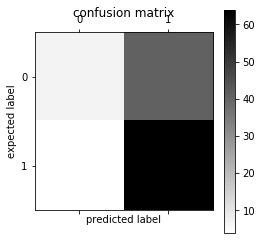

In [126]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(true_value,predicted_train), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_train,y_train)
predicted_train = model.predict(x_train)
true_value = y_train
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 74.14%


In [132]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.83      0.73        48
           2       0.85      0.68      0.75        68

    accuracy                           0.74       116
   macro avg       0.75      0.75      0.74       116
weighted avg       0.77      0.74      0.74       116

Confusion matrix
[[40  8]
 [22 46]]


In [133]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
predicted_train = model.predict(x_train)
true_value = y_train
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 60.34%


In [134]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
              precision    recall  f1-score   support

           1       0.53      0.38      0.44        48
           2       0.63      0.76      0.69        68

    accuracy                           0.60       116
   macro avg       0.58      0.57      0.57       116
weighted avg       0.59      0.60      0.59       116

Confusion matrix
[[18 30]
 [16 52]]
